# 데이터 로드 & 패키지 임포트

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('/Users/kenny/데싸4기/Project/Quest 07/train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


# 데이터 전처리

결측치가 있는 컬럼 수: 19


,결측치 개수,ratio(%)
PoolQC,1162,99.49
MiscFeature,1120,95.89
Alley,1098,94.01
Fence,941,80.57
MasVnrType,694,59.42
FireplaceQu,545,46.66
LotFrontage,218,18.66
GarageType,69,5.91
GarageYrBlt,69,5.91
GarageFinish,69,5.91


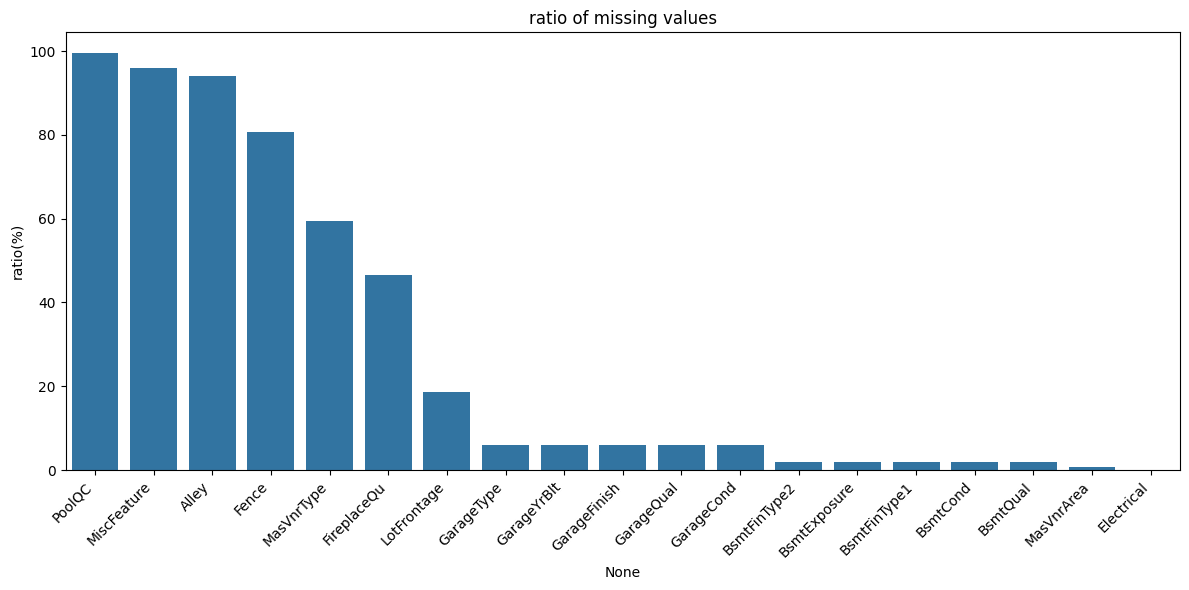

In [2]:

# 결측치 분석
missing_values = house_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # 결측치가 있는 컬럼만 선택
missing_values = pd.DataFrame({
    '결측치 개수': missing_values,
    'ratio(%)': (missing_values / len(house_df) * 100).round(2)
})
missing_values = missing_values.sort_values('결측치 개수', ascending=False)
print('결측치가 있는 컬럼 수:', len(missing_values))
display(missing_values)

# 결측치 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y='ratio(%)', data=missing_values)
plt.xticks(rotation=45, ha='right')
plt.title('ratio of missing values')
plt.tight_layout()
plt.show()

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [4]:
# 3. 남은 결측치 확인
missing = house_df.isnull().sum()
display(missing[missing > 0].sort_values(ascending=False))


PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtFinType2      24
BsmtExposure      24
BsmtFinType1      23
BsmtCond          23
BsmtQual          23
MasVnrArea         8
Electrical         1
dtype: int64

In [5]:
# 4. 수치형 결측치는 중앙값으로 채우기
num_cols = house_df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    if house_df[col].isnull().any():
        median_val = house_df[col].median()
        house_df[col].fillna(median_val, inplace=True)
        print(f"{col} -> median({median_val}) 로 채움")

LotFrontage -> median(69.0) 로 채움
MasVnrArea -> median(0.0) 로 채움
GarageYrBlt -> median(1980.0) 로 채움


In [6]:
# 5. 범주형 결측치는 'None' 으로 채우기
cat_cols = house_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if house_df[col].isnull().any():
        house_df[col].fillna('None', inplace=True)
        print(f"{col} -> 'None' 으로 채움")


Alley -> 'None' 으로 채움
MasVnrType -> 'None' 으로 채움
BsmtQual -> 'None' 으로 채움
BsmtCond -> 'None' 으로 채움
BsmtExposure -> 'None' 으로 채움
BsmtFinType1 -> 'None' 으로 채움
BsmtFinType2 -> 'None' 으로 채움
Electrical -> 'None' 으로 채움
FireplaceQu -> 'None' 으로 채움
GarageType -> 'None' 으로 채움
GarageFinish -> 'None' 으로 채움
GarageQual -> 'None' 으로 채움
GarageCond -> 'None' 으로 채움
PoolQC -> 'None' 으로 채움
Fence -> 'None' 으로 채움
MiscFeature -> 'None' 으로 채움


In [7]:
# 6. 다시 한 번 결측치 확인
print("\n남은 결측치 개수:\n", house_df.isnull().sum().sum())


남은 결측치 개수:
 0


- 수치형(median): 평균(mean)은 이상치에 민감하지만, 중앙값(median)은 극단치에 덜 민감해서 보다 안정적으로 결측을 보완해 줍니다.

- 범주형('None'): 원래 값이 없는 의미(No Garage, No Basement 등)를 보존하기 위해 빈 문자열 대신 명시적인 'None' 카테고리로 채웁니다.

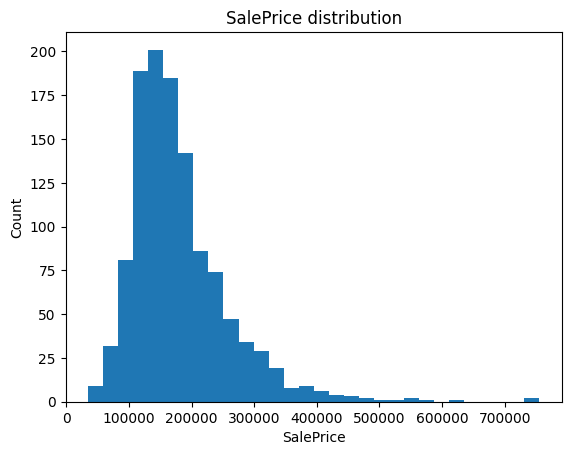

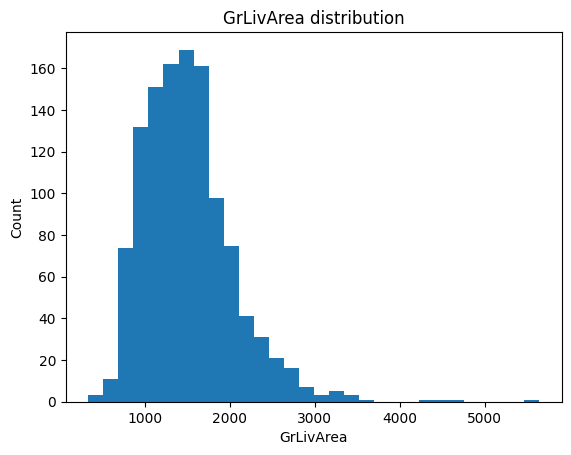

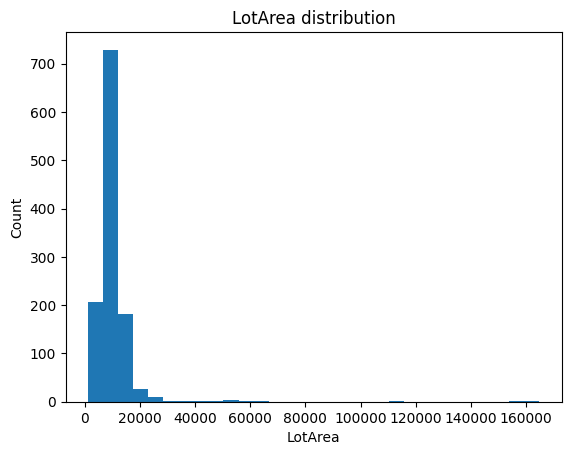

In [8]:
numeric_cols = ['SalePrice', 'GrLivArea', 'LotArea']
for col in numeric_cols:
    plt.figure()
    plt.hist(house_df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} distribution')
    plt.show()

> 세 컬럼 모두 우측첨도를 보임. 로그변환을 정규분포에 근사하는 작업을 통해 문제해결

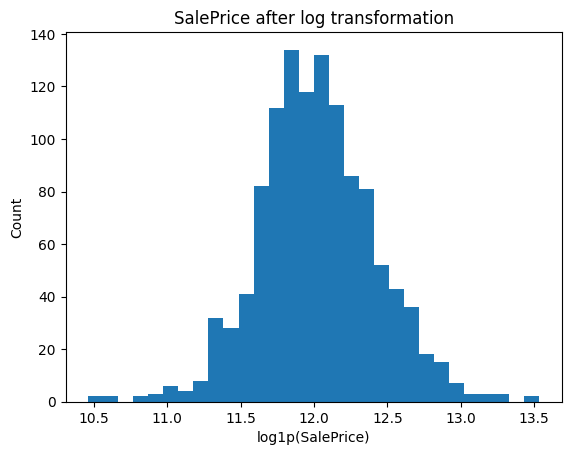

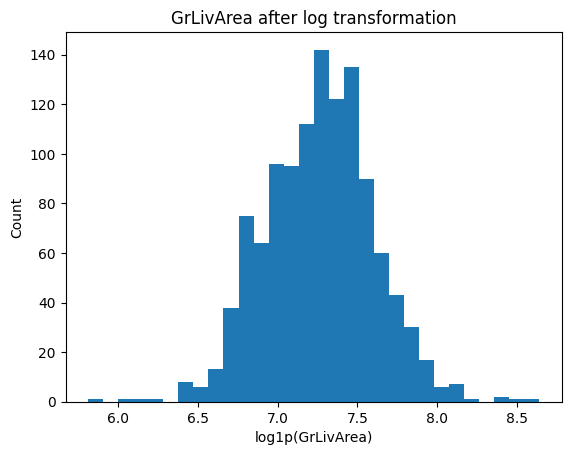

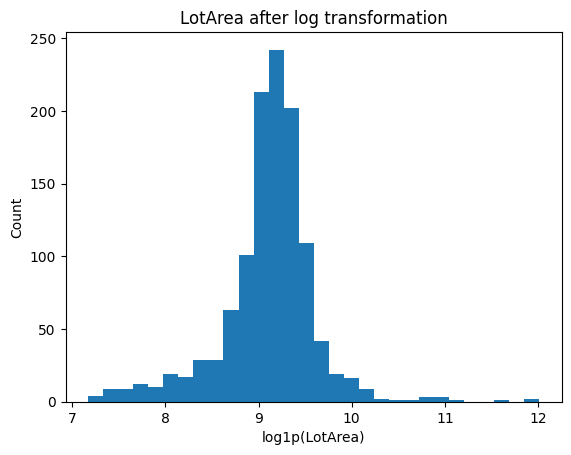

In [9]:
# 1) 로그 변환할 컬럼 리스트 지정
log_cols = ['SalePrice', 'GrLivArea', 'LotArea']

# 2) np.log1p()로 변환  (log(1 + x) 형태로, 0값 처리에 안전)
house_df[log_cols] = house_df[log_cols].apply(np.log1p)

# 3) 변환 결과 확인용 히스토그램 그리기
for col in log_cols:
    plt.figure()
    plt.hist(house_df[col], bins=30)
    plt.xlabel(f'log1p({col})')
    plt.ylabel('Count')
    plt.title(f'{col} after log transformation')
    plt.show()

In [10]:
# ───────── ❶ Feature Engineering ─────────
# 1. 주거 면적 총합
house_df['TotalSF'] = (
    house_df['TotalBsmtSF'] + house_df['1stFlrSF'] + house_df['2ndFlrSF']
)

# 2. 전체 현관·베란다 면적
house_df['TotalPorchSF'] = (
    house_df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
)

# 3. 건축 후 경과연수 & 리모델링 경과연수 (2025년 기준)
house_df['HouseAge']  = 2025 - house_df['YearBuilt']
house_df['RemodAge']  = 2025 - house_df['YearRemodAdd']

# 4. 품질*면적 상호작용
house_df['OverallQual_GrLivArea'] = house_df['OverallQual'] * house_df['GrLivArea']


Id: [15.67 ~ 1443.33] 범위로 캡핑 완료
MSSubClass: [20.00 ~ 190.00] 범위로 캡핑 완료
LotFrontage: [21.00 ~ 137.99] 범위로 캡핑 완료
LotArea: [7.43 ~ 10.41] 범위로 캡핑 완료
OverallQual: [3.00 ~ 10.00] 범위로 캡핑 완료
OverallCond: [3.00 ~ 9.00] 범위로 캡핑 완료
YearBuilt: [1899.34 ~ 2009.00] 범위로 캡핑 완료
YearRemodAdd: [1950.00 ~ 2009.00] 범위로 캡핑 완료
MasVnrArea: [0.00 ~ 779.92] 범위로 캡핑 완료
BsmtFinSF1: [0.00 ~ 1583.89] 범위로 캡핑 완료
BsmtFinSF2: [0.00 ~ 716.30] 범위로 캡핑 완료
BsmtUnfSF: [0.00 ~ 1769.98] 범위로 캡핑 완료
TotalBsmtSF: [0.00 ~ 2177.14] 범위로 캡핑 완료
1stFlrSF: [520.00 ~ 2226.63] 범위로 캡핑 완료
2ndFlrSF: [0.00 ~ 1431.29] 범위로 캡핑 완료
LowQualFinSF: [0.00 ~ 232.66] 범위로 캡핑 완료
GrLivArea: [6.49 ~ 8.07] 범위로 캡핑 완료
BsmtFullBath: [0.00 ~ 1.33] 범위로 캡핑 완료
BsmtHalfBath: [0.00 ~ 1.00] 범위로 캡핑 완료
FullBath: [1.00 ~ 3.00] 범위로 캡핑 완료
HalfBath: [0.00 ~ 1.00] 범위로 캡핑 완료
BedroomAbvGr: [1.00 ~ 5.00] 범위로 캡핑 완료
KitchenAbvGr: [1.00 ~ 2.00] 범위로 캡핑 완료
TotRmsAbvGrd: [3.00 ~ 11.00] 범위로 캡핑 완료
Fireplaces: [0.00 ~ 2.00] 범위로 캡핑 완료
GarageYrBlt: [1916.00 ~ 2009.00] 범위로 캡핑 완료
GarageCars: [

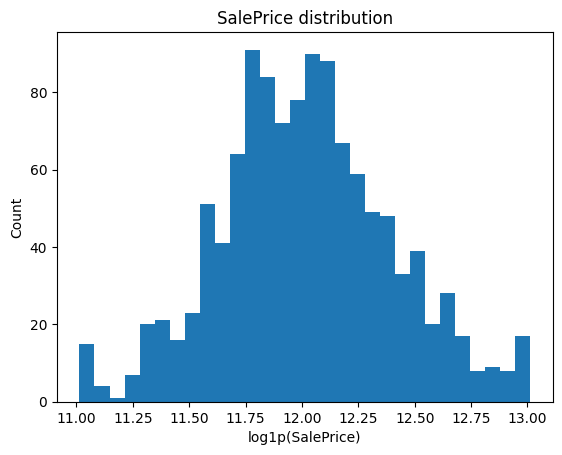

In [11]:
# 1) 캡핑할 수치형 컬럼 자동 탐색
num_cols = house_df.select_dtypes(include=['int64','float64']).columns.tolist()

# 2) 하위 1%, 상위 99% 구하기
lower_bounds = house_df[num_cols].quantile(0.01)
upper_bounds = house_df[num_cols].quantile(0.99)

# 3) clip()으로 이상치 캡핑
for col in num_cols:
    lb = lower_bounds[col]
    ub = upper_bounds[col]
    house_df[col] = house_df[col].clip(lb, ub)
    print(f"{col}: [{lb:.2f} ~ {ub:.2f}] 범위로 캡핑 완료")

# 4) 캡핑 후 분포 확인 (예: SalePrice)
import matplotlib.pyplot as plt

plt.hist(house_df['SalePrice'], bins=30)
plt.xlabel('log1p(SalePrice)')
plt.ylabel('Count')
plt.title('SalePrice distribution')
plt.show()


- 상·하위 1% 극단치는 전체 학습에 과도한 영향을 줍니다.

- clip() 으로 잘라주면 나머지 대부분의 데이터 분포에 집중할 수 있습니다.

In [12]:
from sklearn.preprocessing import StandardScaler
# --- 1. 범주형 변수 인코딩 ---
# object 타입 전체를 더미 변수로 변환 (첫 번째 레벨은 기준치로 drop)
cat_cols = house_df.select_dtypes(include=['object']).columns.tolist()
house_df = pd.get_dummies(house_df, columns=cat_cols, drop_first=True)

# # 8-2. 수치형 스케일링 ─ SalePrice 는 제외
# num_cols = house_df.select_dtypes(include=['int64', 'float64']).columns
# num_cols = [c for c in num_cols if c != 'SalePrice']

# --- 3. 간단한 피처 엔지니어링 예시 ---
#  - TotalSF: 지하(Finished) + 1층 거실 면적
#  - Age: 판매연도에서 건축연도 차이
#  - RemodAge: 판매연도에서 리모델링 연도 차이
house_df['TotalSF']   = house_df['BsmtFinSF1'] + house_df['BsmtFinSF2'] + house_df['GrLivArea']
house_df['Age']       = house_df['YrSold'] - house_df['YearBuilt']
house_df['RemodAge']  = house_df['YrSold'] - house_df['YearRemodAdd']

# 확인
print("인코딩 후 전체 컬럼 수:", house_df.shape[1])
print("새로 만든 피처:", ['TotalSF','Age','RemodAge'])

인코딩 후 전체 컬럼 수: 265
새로 만든 피처: ['TotalSF', 'Age', 'RemodAge']


# 학습 검증

In [13]:
# ======================================================================
# 9. 학습·검증 & RMSLE 계산 (로그 공간에서 직접)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 9-1. y (log1p 변환된 SalePrice), X 분리
y = house_df['SalePrice']              # 이미 log1p 변환된 값
X = house_df.drop(columns=['SalePrice'])

# 9-2. train / validation 분할
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9-3. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 9-4. 예측 및 RMSLE (로그 공간에서 RMSE = RMSLE)
y_pred_log = model.predict(X_val)
rmsle = np.sqrt(mean_squared_error(y_val, y_pred_log))
print(f"RMSLE: {rmsle:.4f}")

RMSLE: 6331.6364


In [14]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np

# 데이터 준비 (앞서 만든 X, y 그대로)
y = house_df['SalePrice']
X = house_df.drop(columns=['SalePrice'])

# 모델 정의
lgbm = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 5-폴드 CV (neg_root_mean_squared_error → RMSLE)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = -cross_val_score(
    lgbm, X, y,
    cv=kf,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
print(f"CV RMSLE (mean ± std): {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

# 학습/검증 세트 분할
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# fit –> 콜백으로 early stopping 100회
lgbm.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(100, verbose=False)]
)

# 예측 및 RMSLE
y_pred_log = lgbm.predict(X_val)
rmsle_val = np.sqrt(mean_squared_error(y_val, y_pred_log))
print(f"Validation RMSLE: {rmsle_val:.4f}")


CV RMSLE (mean ± std): 0.1308 ± 0.0054
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4030
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 167
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.007243
Validation RMSLE: 0.1201


In [15]:
# ───────── ❷ LightGBM Native Categorical ─────────
cat_cols = house_df.select_dtypes(include='object').columns

# train
for c in cat_cols:
    house_df[c] = house_df[c].astype('category')

# test  (이미 로드한 뒤라면 같은 변환 필요)
for c in cat_cols:
    test_df[c] = test_df[c].astype('category')


In [16]:
# # ──────────────────── 10-TUNE : LightGBM 하이퍼파라미터 튜닝 ────────────────────
# import lightgbm as lgb
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from sklearn.metrics import make_scorer, mean_squared_error
# import numpy as np

# # 1) 사용자 정의 RMSLE 스코어러 (로그 공간의 RMSE)
# def rmsle_log(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_true, y_pred))

# rmsle_scorer = make_scorer(rmsle_log, greater_is_better=False)  # neg 값 반환

# # 2) 파라미터 분포 설정 (LightGBM 공식 권장 범위 중심)
# param_dist = {
#     "num_leaves":           np.arange(20, 80, 4),
#     "max_depth":            np.append(np.arange(3, 11), -1),       # -1 : 제한 없음
#     "learning_rate":        np.linspace(0.01, 0.1, 10),
#     "n_estimators":         np.arange(400, 1600, 200),
#     "subsample":            np.linspace(0.6, 1.0, 5),
#     "colsample_bytree":     np.linspace(0.6, 1.0, 5),
#     "min_child_samples":    np.arange(5, 40, 5),
#     "reg_alpha":            np.logspace(-3, 1, 5),  # L1
#     "reg_lambda":           np.logspace(-3, 1, 5)   # L2
# }

# # 3) 모델·CV·탐색기 정의
# lgbm_base = LGBMRegressor(
#     random_state=42,
#     objective="regression",
#     metric="rmse",
#     # 큰 n_estimators 를 주고 early_stopping 으로 실제 tree 수를 줄일 수도 있음
# )

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# search = RandomizedSearchCV(
#     estimator=lgbm_base,
#     param_distributions=param_dist,
#     n_iter=30,                # 탐색 횟수 (시간 여유 있으면 ↑)
#     scoring=rmsle_scorer,     # 음수 RMSLE
#     cv=kf,
#     verbose=2,
#     n_jobs=-1,                # 가능한 모든 CPU 사용
#     random_state=42
# )

# # 4) 탐색 실행
# search.fit(X, y)   # X, y 는 직전 셀에서 사용한 전처리 완료 데이터

# print("\nBest RMSLE (CV):", -search.best_score_)
# print("Best Params:\n", search.best_params_)

# # 5) 최적 모델을 검증 세트에 적용해 점수 확인
# best_lgbm = search.best_estimator_
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )
# best_lgbm.fit(X_train, y_train,
#               eval_set=[(X_val, y_val)],
#               eval_metric="rmse",
#               callbacks=[lgb.early_stopping(100, verbose=False)]
# )

# y_pred_log = best_lgbm.predict(X_val)
# rmsle_val = rmsle_log(y_val, y_pred_log)
# print("Validation RMSLE:", rmsle_val)
# # ────────────────────────────────────────────────────────────────────────────────


In [17]:
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import numpy as np

# ① 없으면 직접 지정
best_params = {
    'num_leaves': 56,
    'max_depth': -1,
    'learning_rate': 0.03,
    'n_estimators': 1200,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_samples': 10,
    'reg_alpha': 0.001,
    'reg_lambda': 0.1,
    'random_state': 42
}

# ② LightGBM
lgbm = LGBMRegressor(**best_params)
lgbm.fit(X_train, y_train)
pred_lgb_log = lgbm.predict(X_val)

# ③ XGBoost
xgb = XGBRegressor(
    n_estimators=1200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist'
)
xgb.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        
        verbose=False)
pred_xgb_log = xgb.predict(X_val)

# ④ 단순 평균 블렌딩
pred_blend_log = 0.5 * pred_lgb_log + 0.5 * pred_xgb_log
rmsle_blend = np.sqrt(mean_squared_error(y_val, pred_blend_log))
print("Blend RMSLE :", rmsle_blend)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4076
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 189
[LightGBM] [Info] Start training from score 12.007243
Blend RMSLE : 0.12254002245840376


In [18]:
# (한 번만 실행)  ──────────────────────────────────────────────
# house_df : train.csv 에 전처리·파생 피처까지 끝낸 DataFrame
train_medians = house_df.select_dtypes('number').median()


In [20]:
import pandas as pd
import numpy as np

# 1) test 데이터 로드
test_df_raw = pd.read_csv('/Users/kenny/데싸4기/Project/Quest 07/test.csv')
id_col = test_df_raw['Id']  # 제출 시 다시 붙일 컬럼
test_df = test_df_raw.drop(columns=['Id'])

# 삭제할 컬럼 리스트
drop_cols = ['PoolQC','Alley','Fence','FireplaceQu',
             'MiscFeature','MasVnrType','Id']

# 2) train 단계와 동일한 전처리
# ─ 컬럼 삭제
test_df.drop(columns=drop_cols, errors='ignore', inplace=True)

# ─ 결측치 채우기
for c in test_df.select_dtypes(include='number').columns:
    test_df[c].fillna(train_medians[c], inplace=True)
for c in test_df.select_dtypes(include='object').columns:
    test_df[c].fillna('None', inplace=True)

# ─ 로그 변환 · 캡핑 (존재하는 컬럼만)
common_log_cols = [c for c in log_cols if c in test_df.columns]
test_df[common_log_cols] = test_df[common_log_cols].apply(np.log1p)

# 캡핑: 존재하는 컬럼에만 적용
for c in common_log_cols:
    lb = lower_bounds.get(c, None)
    ub = upper_bounds.get(c, None)
    if lb is not None and ub is not None:
        test_df[c] = test_df[c].clip(lb, ub)

# 누락된 log_cols 확인
missing_log = set(log_cols) - set(common_log_cols)
if missing_log:
    print("테스트에 누락된 log_cols:", missing_log)

# ─ 파생 피처 6개 생성
test_df['TotalSF']      = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['TotalBath']    = (test_df['FullBath']
                           + 0.5 * test_df['HalfBath']
                           + test_df['BsmtFullBath']
                           + 0.5 * test_df['BsmtHalfBath'])
test_df['Age']          = test_df['YrSold'] - test_df['YearBuilt']
test_df['RemodAge']     = test_df['YrSold'] - test_df['YearRemodAdd']
test_df['IsRemod']      = (test_df['YearBuilt'] != test_df['YearRemodAdd']).astype(int)
test_df['Qual_x_GrLiv'] = test_df['OverallQual'] * test_df['GrLivArea']

# ─ 원-핫 인코딩 및 열 정렬
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)

# train에서 쓰던 X.columns 기준으로 빠진 열 채우기
missing_cols = set(X.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# 열 순서 고정
test_df = test_df[X.columns]


테스트에 누락된 log_cols: {'SalePrice'}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4019
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 159
[LightGBM] [Info] Start training from score 12.020765
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4022
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 157
[LightGBM] [Info] Start training from score 12.030279
[LightGBM] [Warning] Found w

In [21]:
# ───────── ❶ 테스트용 Feature Engineering ─────────
# train 쪽과 변수명이 같도록, house_df → test_df 로만 바꾼 버전
test_df['TotalSF']              = (
    test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
)
test_df['TotalPorchSF']         = (
    test_df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
)
test_df['HouseAge']             = 2025 - test_df['YearBuilt']
test_df['RemodAge']             = 2025 - test_df['YearRemodAdd']
test_df['OverallQual_GrLivArea'] = (
    test_df['OverallQual'] * test_df['GrLivArea']
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4012
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 159
[LightGBM] [Info] Start training from score 12.019908


In [22]:
# log-스케일 예측
test_pred_log = best_lgbm.predict(test_df)

# 원래 스케일(SalePrice)로 역변환
test_pred = np.expm1(test_pred_log)

NameError: name 'best_lgbm' is not defined

In [32]:
# ─────────────────── 최종 셀: 모델 학습 → 제출 파일 생성 ───────────────────
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import os

# 1) 전체 train 데이터로 두 모델 다시 학습
lgbm_full = LGBMRegressor(**best_params)
lgbm_full.fit(X, y)

xgb_full = XGBRegressor(
    n_estimators=1200, learning_rate=0.05, max_depth=4,
    subsample=0.8, colsample_bytree=0.8,
    objective='reg:squarederror', random_state=42,
    tree_method='hist'
)
xgb_full.fit(X, y)

# 2) test 예측 (log-스케일) → 0.5 × 0.5 블렌딩
pred_test_log = 0.5 * lgbm_full.predict(test_df) + \
                0.5 * xgb_full.predict(test_df)

# 3) 역변환(Log → 원 단위) 후 CSV 생성
submission = pd.DataFrame({
    "Id": id_col,
    "SalePrice": np.expm1(pred_test_log)
})

save_path = os.path.join(os.getcwd(), "submission_blend2.csv")
submission.to_csv(save_path, index=False)
print(f"✅  submission_blend2.csv 저장 완료 → {save_path}")
# ───────────────────────────────────────────────────────────────────────────


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3530
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 176
[LightGBM] [Info] Start training from score 12.020602
✅  submission_blend.csv 저장 완료 → /Users/kenny/submission_blend.csv
